# Introduction to HvPlot

In [1]:
import pandas as pd

In [36]:
df = pd.read_csv("./datasets/closing_price.csv", 
                 index_col='Date',
                 parse_dates=True)

In [37]:
df.head()

,AAPL,MSFT,IBM
Date,,,
2019-11-01,62.830273,140.552994,115.847458
2019-11-04,63.242901,141.364731,117.676682
2019-11-05,63.152027,141.276733,117.864746
2019-11-06,63.179031,140.885513,118.625488
2019-11-07,63.908203,141.081116,119.083855


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2019-11-01 to 2021-11-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    504 non-null    float64
 1   MSFT    504 non-null    float64
 2   IBM     504 non-null    float64
dtypes: float64(3)
memory usage: 15.8 KB


In [39]:
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
plt.rc("figure", figsize=(16, 5))

<Axes: title={'center': 'Stock Prices Over Time'}, xlabel='Date', ylabel='Price'>

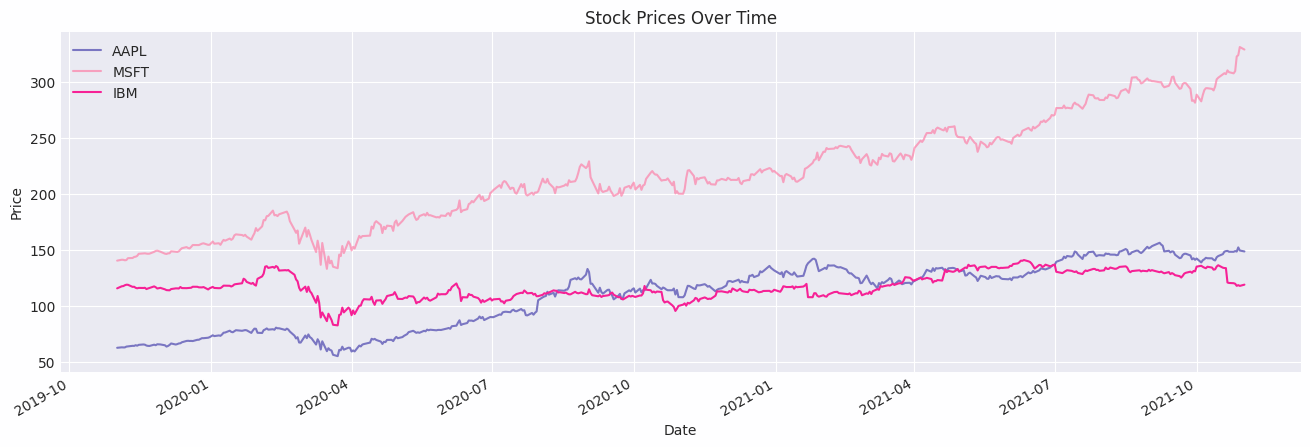

In [40]:
df.plot(title='Stock Prices Over Time',
        xlabel='Date',
        ylabel='Price')

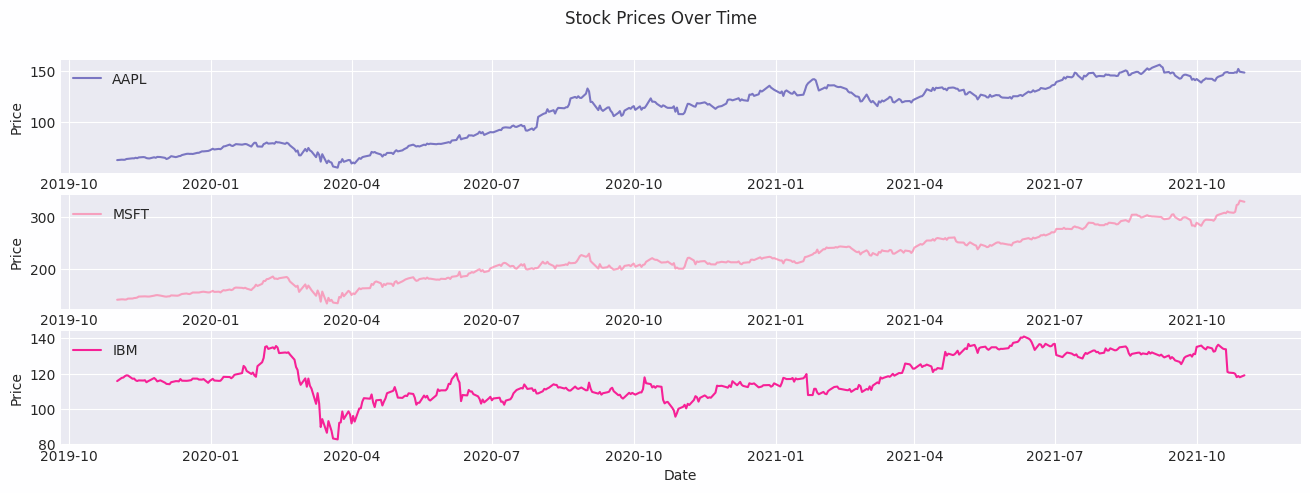

In [41]:
df.plot(title='Stock Prices Over Time',
        xlabel='Date',
        ylabel='Price',
        subplots=True,
        sharex=False)
plt.show()

<Axes: xlabel='Date'>

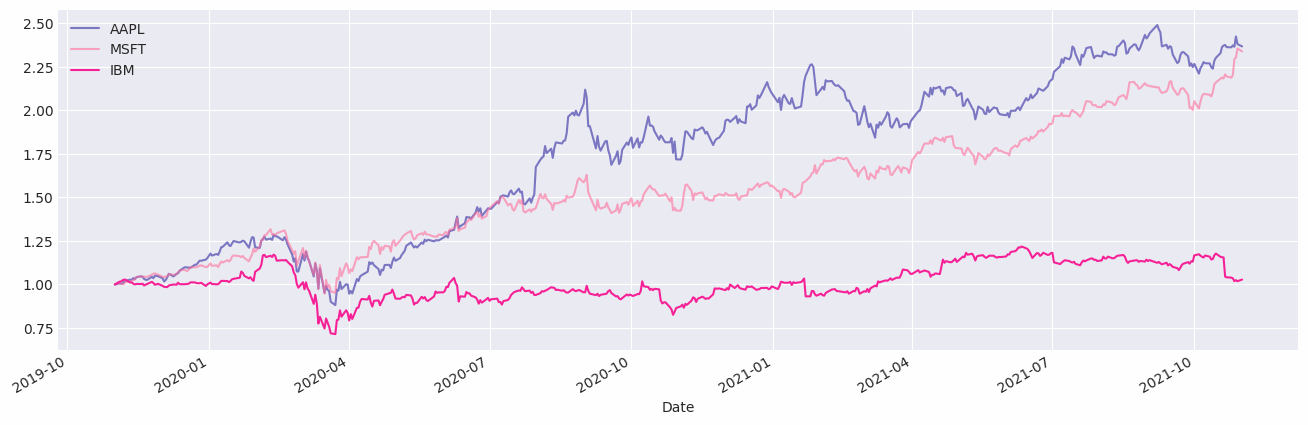

In [42]:
df.div(df.iloc[0]).plot()

In [43]:
df.div(df.iloc[0]).head()

,AAPL,MSFT,IBM
Date,,,
2019-11-01,1.000000,1.000000,1.000000
2019-11-04,1.006567,1.005775,1.015790
2019-11-05,1.005121,1.005149,1.017413
2019-11-06,1.005551,1.002366,1.023980
2019-11-07,1.017156,1.003757,1.027937


<Axes: xlabel='Date'>

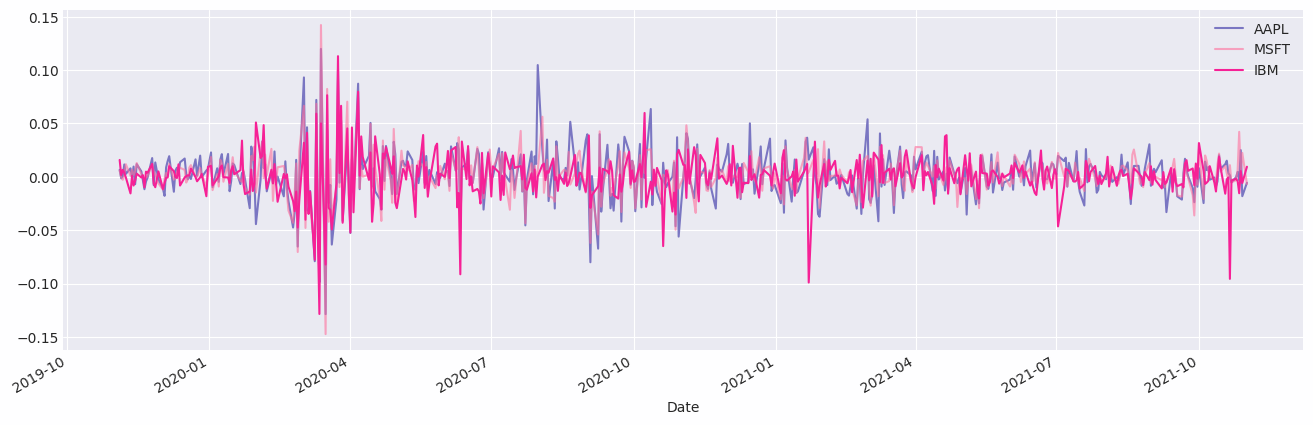

In [44]:
df.pct_change().plot()

In [45]:
import hvplot.pandas

In [47]:
df.hvplot(title='Stock Prices Over Time',
        ylabel='Price',
        xlabel='Dates')


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [48]:
df.hvplot(title='Stock Prices Over Time',
        ylabel='Price',
        xlabel='Dates',
        subplots=True,
        sharex=False,
        sharey=True)

:NdLayout   [Variable]
   :Curve   [Date]   (value)

In [50]:
sp500 = pd.read_csv("./datasets/sp500_companies.csv")

In [52]:
sp500.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [54]:
sp500_sectors = sp500['Sector'].value_counts()
sp500_sectors.head()

Sector
Consumer Discretionary    84
Information Technology    70
Financials                68
Industrials               67
Health Care               61
Name: count, dtype: int64

<Axes: xlabel='Sector'>

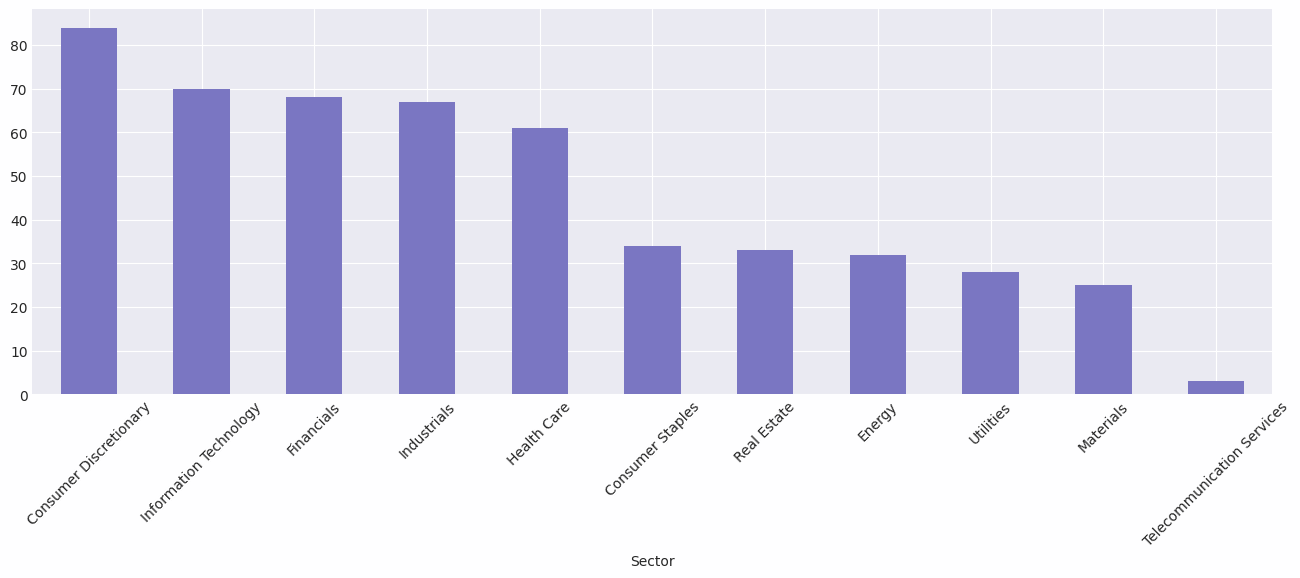

In [55]:
sp500_sectors.plot(kind='bar', rot=45)

In [56]:
sp500_sectors.hvplot(kind='bar', rot=45)

:Bars   [Sector]   (count)

In [ ]:
sp500.hvplot(
    kind='scatter', 
    rot=45,
    title='Market Cap Companies', 
    x='Earnings/Share', 
    y='Price',
    hover_cols=['Name', 'Symbol']
    )

:Scatter   [Earnings/Share]   (Price,Name,Symbol)

In [63]:
sp500['Sector'].value_counts().hvplot(kind='bar').opts(
    title="Sector breakdown",
    hover_color='orange',
    color='purple'
)

:Bars   [Sector]   (count)

In [64]:
hospital = pd.read_csv("./datasets/hospital_claims.csv")

In [65]:
hospital.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


In [66]:
procedures_552_charge = hospital[hospital['DRG Definition'] == '552 - MEDICAL BACK PROBLEMS W/O MCC']

In [67]:
procedures_552_charge.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
118109,552 - MEDICAL BACK PROBLEMS W/O MCC,50128,TRI-CITY MEDICAL CENTER,4002 VISTA WAY,OCEANSIDE,CA,92056,CA - San Diego,14,26610.85,5970.57,5007.14
118137,552 - MEDICAL BACK PROBLEMS W/O MCC,50764,SHASTA REGIONAL MEDICAL CENTER,1100 BUTTE ST,REDDING,CA,96001,CA - Redding,29,36127.31,6305.17,5219.93
118355,552 - MEDICAL BACK PROBLEMS W/O MCC,60001,NORTH COLORADO MEDICAL CENTER,1801 16TH STREET,GREELEY,CO,80631,CO - Greeley,48,20543.02,5454.12,4252.91
118383,552 - MEDICAL BACK PROBLEMS W/O MCC,100009,UNIVERSITY OF MIAMI HOSPITAL,1400 NW 12TH AVE,MIAMI,FL,33136,FL - Miami,37,40265.86,6362.72,5466.67
120657,552 - MEDICAL BACK PROBLEMS W/O MCC,100012,LEE MEMORIAL HOSPITAL,2776 CLEVELAND AVE,FORT MYERS,FL,33901,FL - Fort Myers,83,20712.84,4889.45,3755.37


In [80]:
total_payments_by_state = procedures_552_charge.groupby('Provider State')[['Average Total Payments']].sum()
total_payments_by_state.head()

,Average Total Payments
Provider State,
AK,7134.40
AL,149613.29
AR,116147.95
AZ,151868.43
CA,1068146.26


In [81]:
total_payments_by_state.hvplot.bar(rot=90)

:Bars   [Provider State]   (Average Total Payments)

In [82]:
total_payments_by_state.hvplot.bar(rot=90) + total_payments_by_state.sort_values(by='Average Total Payments').hvplot(rot=90)

:Layout
   .Bars.I  :Bars   [Provider State]   (Average Total Payments)
   .Curve.I :Curve   [Provider State]   (Average Total Payments)

In [83]:
sorted_total_payments_by_state = total_payments_by_state.copy()
sorted_total_payments_by_state.index.names = ["Provider State Sorted"]

total_payments_by_state.hvplot.bar(rot=90) + sorted_total_payments_by_state.sort_values("Average Total Payments").hvplot(rot=45)

:Layout
   .Bars.I  :Bars   [Provider State]   (Average Total Payments)
   .Curve.I :Curve   [Provider State Sorted]   (Average Total Payments)

In [88]:
total_payments_by_state.sort_values("Average Total Payments").hvplot.bar(rot=90, label='Avg Cost') * sorted_total_payments_by_state.sort_values("Average Total Payments").hvplot(rot=45, label='Trend Over Time')

:Overlay
   .Bars.Avg_Cost         :Bars   [Provider State]   (Average Total Payments)
   .Curve.Trend_Over_Time :Curve   [Provider State Sorted]   (Average Total Payments)